In [1]:
import coursierapi.MavenRepository

interp.repositories.update(
  interp.repositories() ::: List(MavenRepository.of("https://dl.bintray.com/cibotech/public"))
)

import coursierapi.MavenRepository



In [57]:
import $ivy.`com.cibo::evilplot-repl:0.8.0`

import com.cibo.evilplot.plot._
import com.cibo.evilplot.plot.aesthetics.DefaultTheme._
import com.cibo.evilplot.numeric.Point
import com.cibo.evilplot.colors._
import com.cibo.evilplot.plot.renderers.PointRenderer

val renderer = Option( PointRenderer.default[Point](color = Some(HTMLNamedColors.green), pointSize=Some(0.5) ) )

def myRound(d: Double): Double = scala.math.round(d * 2000.0) / 2000.0

def showPlot(plot: com.cibo.evilplot.geometry.Drawable) =
  Image.fromRenderedImage(plot.asBufferedImage, Image.PNG)

import java.awt.image.BufferedImage
def joinBufferedImage(img1: BufferedImage, img2: BufferedImage) = { //int offset = 2;
    val width = img1.getWidth + img2.getWidth
    val height = List(img1.getHeight, img2.getHeight).max
    val newImage = new BufferedImage(width, height, BufferedImage.TYPE_INT_ARGB)
    val g2 = newImage.createGraphics
    //val oldColor = g2.getColor
    //g2.setPaint(Color.WHITE)
    //g2.fillRect(0, 0, width, height)
    //g2.setColor(oldColor)
    g2.drawImage(img1, null, 0, 0)
    g2.drawImage(img2, null, img1.getWidth, 0)
    g2.dispose()
    newImage
}

def showPlots(plots: Seq[com.cibo.evilplot.geometry.Drawable]) =
  Image.fromRenderedImage(plots.map(_.asBufferedImage).reduce(joinBufferedImage), Image.PNG)


import $ivy.$                              


import com.cibo.evilplot.plot._

import com.cibo.evilplot.plot.aesthetics.DefaultTheme._

import com.cibo.evilplot.numeric.Point

import com.cibo.evilplot.colors._

import com.cibo.evilplot.plot.renderers.PointRenderer


renderer: Option[PointRenderer[Point]] = Some(
  com.cibo.evilplot.plot.renderers.PointRenderer$$anon$2@32e7c0cf
)
defined function myRound
defined function showPlot
import java.awt.image.BufferedImage

defined function joinBufferedImage
defined function showPlots

Logistic map (common defenition) (Verhulst-Pearl): $x_{n+1}=rx_n(1-x_n)$ <br/>
Logistic map (other defenition) has the similar features: $x_{n+1}=1-\lambda x_n^2$

In [55]:
import scala.collection.immutable.NumericRange
// double fractional range is depricated; 2.12 specific!

case class Task(title: String, range: NumericRange[Double], formula:(Double)=>(Double)=>Double)

val step = 0.002

val tasks = Seq(
    Task("Classic logistic map", (1.0 to 4.0 by step), (r:Double)=>(x:Double)=>r*x*(1-x)),
    Task("Logistic map (other defenition)", (step to 2.0 by step), (l:Double)=>(x:Double)=>1-l*x*x)
)
// x = x*scala.math.exp(l*(1-x/k)) // Ricker model // range:  (step to 4.0 by step) 

import scala.collection.immutable.NumericRange
// double fractional range is depricated; 2.12 specific!


defined class Task
step: Double = 0.002
tasks: Seq[Task] = List(
  Task(
    "Classic logistic map",
    NumericRange.Inclusive(
      1.0,
      1.002,
      1.004,
      1.006,
      1.008,
      1.01,
      1.012,
      1.014,
      1.016,
      1.018,
      1.02,
      1.022,
      1.024,
      1.026,
      1.028,
      1.03,
      1.032,
      1.034,
      1.036,
      1.038,
      1.04,
      1.042,
      1.044,
      1.046,
      1.048,
      1.05,
      1.052,
      1.054,
      1.056,
      1.058,
      1.06,
      1.062,
      1.064,
      1.066,
      1.068,
...

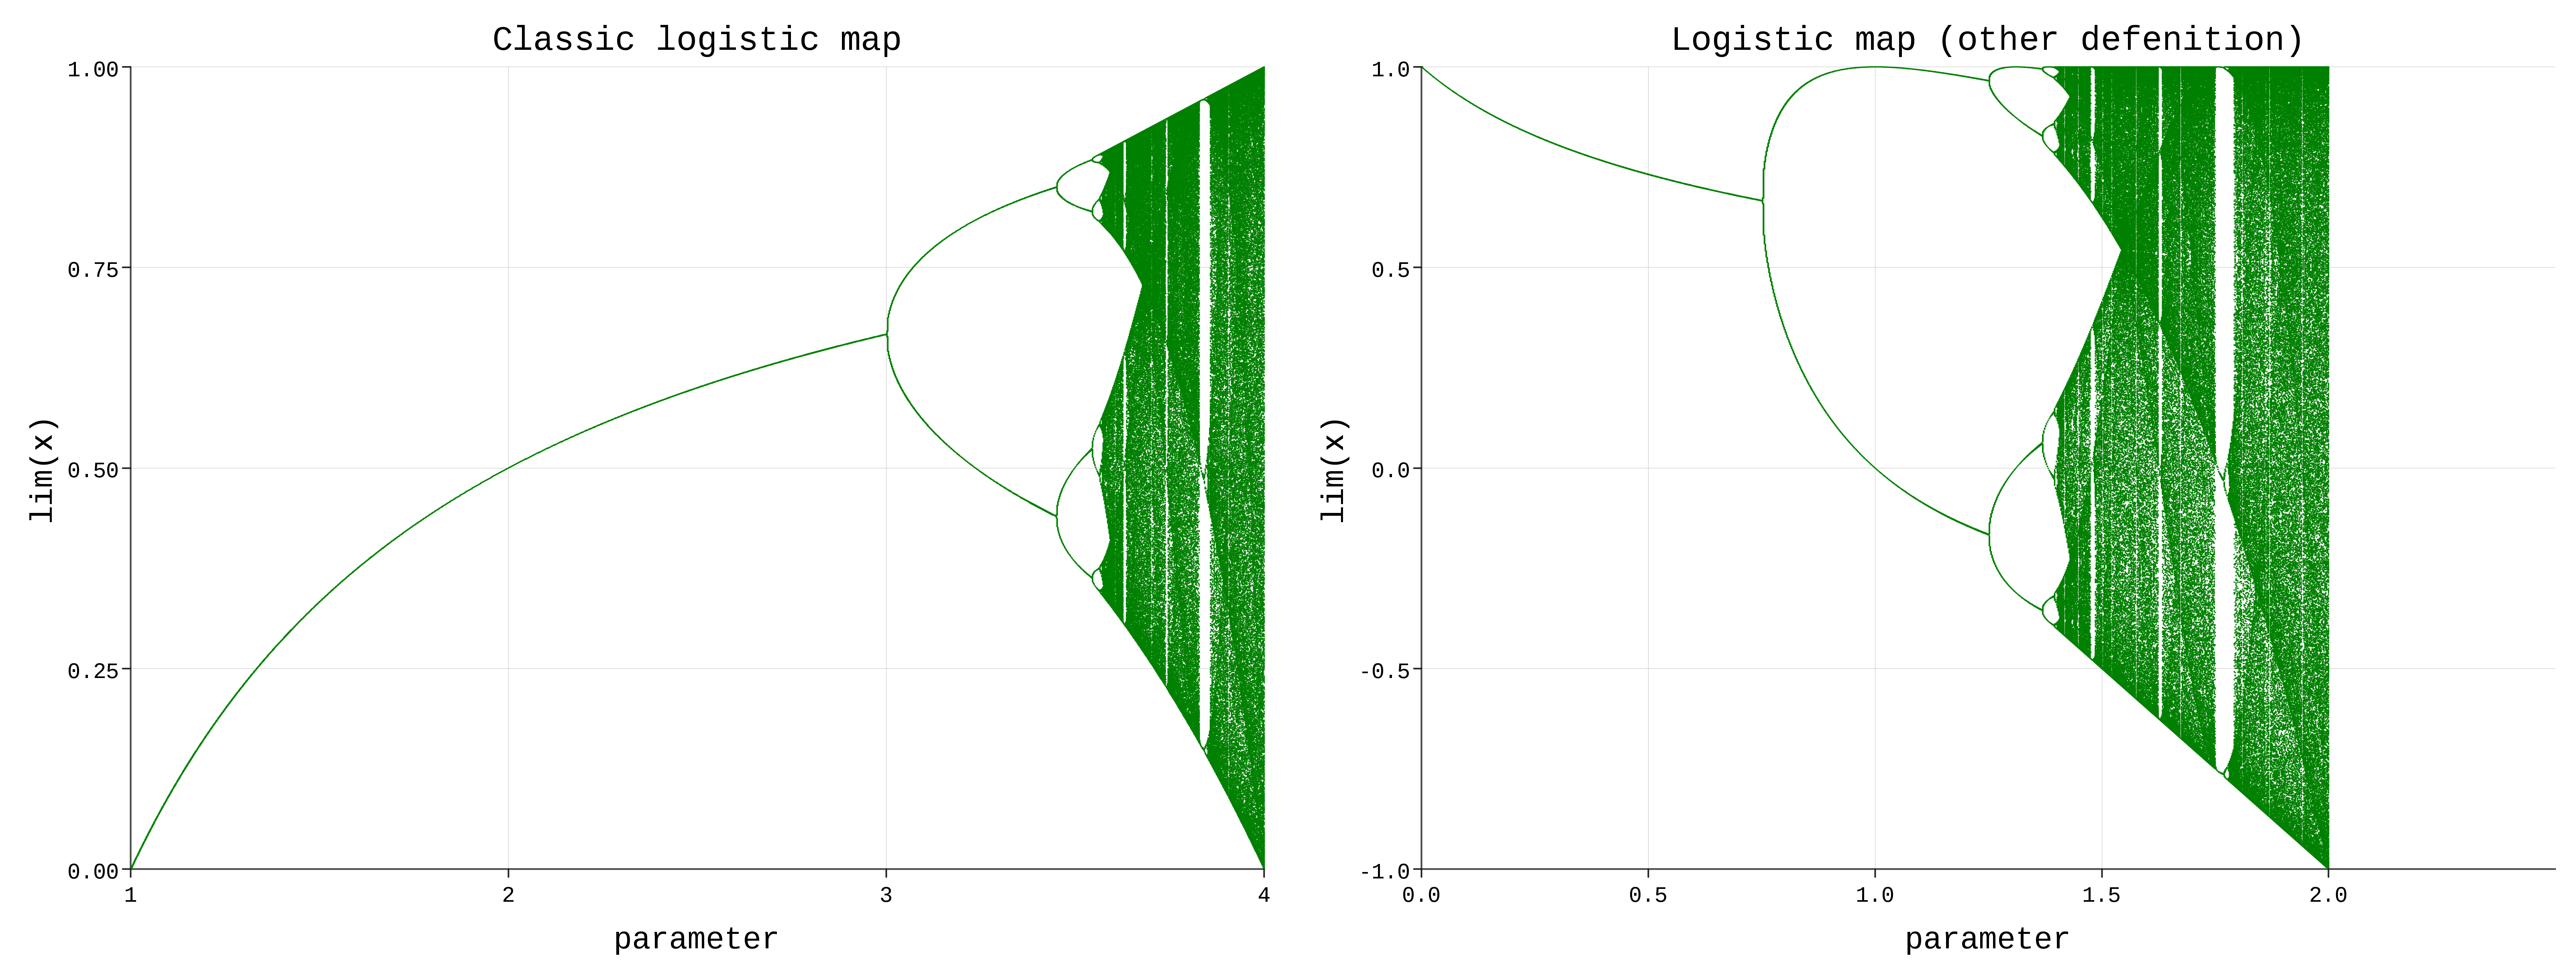

plots: Seq[com.cibo.evilplot.geometry.Drawable] = List(
  Group(
    Vector(
      Translate(
        StrokeStyle(
          Group(
            Vector(
              Translate(
                Rotate(Line(516.0, 1.0), 90.0),
                -0.5000000000000158,
                0.0
              ),
              Translate(Line(729.39453125, 1.0), 0.0, 515.5)
            )
          ),
          HSLA(0.0, 0.0, 12.0, 1.0)
        ),
        70.60546875000001,
        33.0
      ),
      Translate(
        Group(
          Vector(
            Translate(
              Rotate(
                StrokeStyle(Line(516.0, 0.25), HSLA(0.0, 0.0, 65.0, 0.8)),
                90.0
              ),
              -0.1250000000000158,
              0.0
            ),
            Translate(
              Rotate(
                StrokeStyle(Line(516.0, 0.25), HSLA(0.0, 0.0, 65.0, 0.8)),
                90.0
              ),
              243.00651041666663,
              0.0
            ),
...

In [58]:
val plots = tasks.map { case Task(title,range,formula) =>
    var x = step 
    val points = range.flatMap { p => 
            (1 to 1000).map { _ =>
                x = formula(p)(x)
                p -> myRound(x) // myRound just for drawing optimization
            }
    }.distinct.map( Point.apply _ tupled(_) ) 
    
    ScatterPlot(
      points,
      pointRenderer = renderer 
    )
      .standard()
      .title(title)
      .xLabel("parameter")
      .yLabel("lim(x)")
      .rightLegend()
      .render()
}

showPlots(plots)    
